<a href="https://colab.research.google.com/github/SachiSachu/CS401/blob/main/SVM_non_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm

In [11]:
# load data
X_1 = np.loadtxt('class1_train.txt')
X_2 = np.loadtxt('class2_train.txt')
X_3 = np.loadtxt('class3_train.txt')
X_1_val = np.loadtxt('class1_val.txt')
X_2_val = np.loadtxt('class2_val.txt')
X_3_val = np.loadtxt('class3_val.txt')
X_1_test = np.loadtxt('class1_test.txt')
X_2_test = np.loadtxt('class2_test.txt')
X_3_test = np.loadtxt('class3_test.txt')
X_train = np.concatenate((X_1, X_2, X_3))
y_train = np.zeros((X_train.shape[0]))
y_train[0:X_1.shape[0]] = 0
y_train[X_1.shape[0]:] = 1

Text(0, 0.5, 'X2')

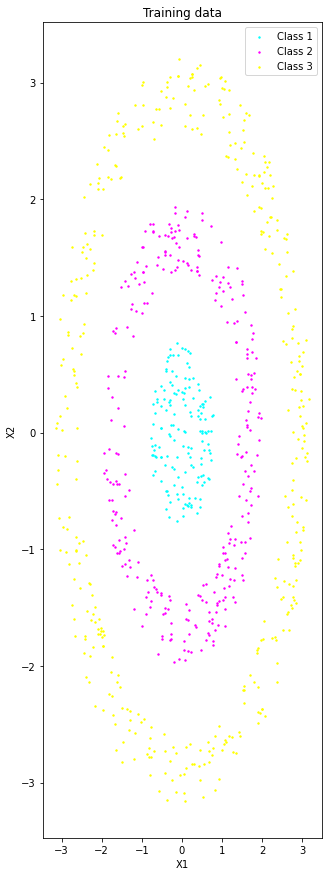

In [21]:
# simply visualising data
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'cyan', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'magenta', s = 2)
C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'yellow', s = 2)
plt.legend((C1plt, C2plt, C3plt), ('Class 1', 'Class 2', 'Class 3'))
plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

In [14]:
# svm classifier
clf = svm.SVC(kernel = 'poly', degree = 3, gamma = 'scale', coef0 = 1, decision_function_shape='ovo')
clf.fit(X_train, y_train)

SVC(coef0=1, decision_function_shape='ovo', kernel='poly')

In [15]:
# confusion matrix
# rows: predicted classes, columns: true classes
ConfusionMatrix = np.zeros((3, 3))
X = [X_1_test, X_2_test, X_3_test]
for i in range(3):
    for x in X[i]:
        x = x.reshape(1, -1)
        ConfusionMatrix[int(clf.predict(x)), i] = ConfusionMatrix[int(clf.predict(x)), i]+1
pd.DataFrame(ConfusionMatrix, ['Predicted 1', 'Predicted 2', 'Predicted 3'],['True 1', 'True 2', 'True 3'])

,True 1,True 2,True 3
Predicted 1,60.0,0.0,0.0
Predicted 2,0.0,120.0,160.0
Predicted 3,0.0,0.0,0.0


In [16]:
# performance measures
N = np.sum(ConfusionMatrix[:, 0])
TP = ConfusionMatrix[0, 0]
TN = ConfusionMatrix[1, 1]
FP = ConfusionMatrix[0, 1]
FN = ConfusionMatrix[1, 0]
Accuracy = 100*TP/N
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F_measure = 2*Precision*Recall/(Precision+Recall)
print({
    'Accuracy: ': Accuracy,
})
print({
    'Precision: ': Precision,
})
print({
    'Recall: ': Recall,
})
print({
    'F_measure: ': F_measure,
})

{'Accuracy: ': 100.0}
{'Precision: ': 1.0}
{'Recall: ': 1.0}
{'F_measure: ': 1.0}


/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


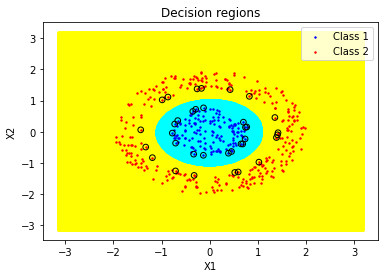

In [8]:
# Decision region plot for all the classes together with the training data superposed
x_min = min([min(X_1[:, 0]), min(X_2[:, 0]), min(X_3[:, 0])])
y_min = min([min(X_1[:, 1]), min(X_2[:, 1]), min(X_3[:, 1])])
x_max = max([max(X_1[:, 0]), max(X_2[:, 0]), max(X_3[:, 0])])
y_max = max([max(X_1[:, 1]), max(X_2[:, 1]), max(X_3[:, 1])])
x_1 = []
x_2 = []
#x_3 = []
for x1 in np.arange(x_min, x_max, 0.01):
    for y in np.arange(y_min, y_max, 0.01):
        c = clf.predict([[x1, y]])
        if c == 0:
            x_1.append([x1, y])
        elif c == 1:
            x_2.append([x1, y])
 #       else:
  #          x_3.append([x1, y])
x_1 = np.array(x_1)
x_2 = np.array(x_2)
#x_3 = np.array(x_3)
plt.scatter(x_1[:, 0], x_1[:, 1], color = 'cyan', s = 2)
plt.scatter(x_2[:, 0], x_2[:, 1], color = 'yellow', s = 2)
#plt.scatter(x_3[:, 0], x_3[:, 1], color = 'yellow', s = 2)
C1plt = plt.scatter(X_1[:, 0], X_1[:, 1], color = 'blue', s = 2)
C2plt = plt.scatter(X_2[:, 0], X_2[:, 1], color = 'red', s = 2)
#C3plt = plt.scatter(X_3[:, 0], X_3[:, 1], color = 'green', s = 2)
plt.title('Decision regions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend((C1plt, C2plt), ('Class 1', 'Class 2'))
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='black', s = 32)